In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading in the ratings dataset
ratings_df =   pd.read_csv("./dataSet/ratings.csv") 
ratings_df.head()

,userId,placeId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [3]:
ratings_df.columns = ['UserID', 'PlaceID', 'Rating']
ratings_df.head()

,UserID,PlaceID,Rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [4]:
place_df = pd.read_csv("./dataSet/restaurants.csv") 
place_df.columns = ['PlaceID', 'Name']

In [5]:
place_df.head()

,PlaceID,Name
0,1,Oskar Blues Taproom
1,2,Flying Elephants at PDX
2,3,The Reclaimory
3,4,Great Clips
4,5,Crossfit Terminus


In [6]:
len(place_df)

9742

In [7]:
user_rating_df = ratings_df.pivot(index='UserID', columns='PlaceID', values='Rating')
user_rating_df.head()

PlaceID,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[0.8, 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ]])

In [9]:
hiddenUnits = 80
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [10]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 80), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [11]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 20 hidden states: ", h0[0][0:20])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 20 hidden states:  tf.Tensor([1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.], shape=(20,), dtype=float32)
hidden state shape:  (1, 80)
v0 state shape:   (9724,)
v1 state shape:   (9724,)


In [12]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.49526945


Epoch: 1 batch #: 0  of 1 sample #: 499 reconstruction error: 0.013830
Epoch: 1 batch #: 1  of 1 sample #: 109 reconstruction error: 0.167938
Epoch: 2 batch #: 0  of 1 sample #: 499 reconstruction error: 0.011876
Epoch: 2 batch #: 1  of 1 sample #: 109 reconstruction error: 0.132562
Epoch: 3 batch #: 0  of 1 sample #: 499 reconstruction error: 0.010621
Epoch: 3 batch #: 1  of 1 sample #: 109 reconstruction error: 0.117157
Epoch: 4 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007742
Epoch: 4 batch #: 1  of 1 sample #: 109 reconstruction error: 0.112981
Epoch: 5 batch #: 0  of 1 sample #: 499 reconstruction error: 0.009901
Epoch: 5 batch #: 1  of 1 sample #: 109 reconstruction error: 0.113495
Epoch: 6 batch #: 0  of 1 sample #: 499 reconstruction error: 0.008112
Epoch: 6 batch #: 1  of 1 sample #: 109 reconstruction error: 0.109937
Epoch: 7 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007659
Epoch: 7 batch #: 1  of 1 sample #: 109 reconstruction error: 0.110122
Epoch:

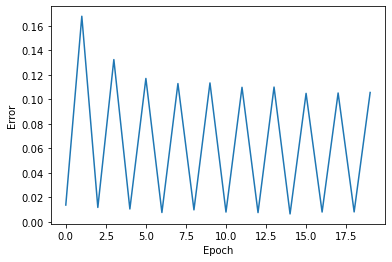

In [13]:
epochs = 10
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)
    
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [14]:
mock_user_id = 25

In [15]:
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser

print(v0)
v0.shape

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(9724,), dtype=float32)


TensorShape([9724])

In [16]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([9724])

In [17]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[5.0311685e-03 8.3214045e-04 9.6095291e-06 ... 3.4213066e-04 1.0783414e-04
 5.1692128e-04], shape=(9724,), dtype=float32)


In [18]:
scored_place_df_mock = place_df[place_df['PlaceID'].isin(user_rating_df.columns)]


In [19]:

scored_place_df_mock

,PlaceID,Name
0,1,Oskar Blues Taproom
1,2,Flying Elephants at PDX
2,3,The Reclaimory
3,4,Great Clips
4,5,Crossfit Terminus
...,...,...
9737,193581,Tavern In The Square
9738,193583,Greenbriar Mall
9739,193585,Kung Fu Tea
9740,193587,Luby's


In [20]:
scored_place_df_mock = scored_place_df_mock.assign(RecommendationScore = rec[0])
scored_place_df_mock.sort_values(["RecommendationScore"], ascending=False).head(10)

,PlaceID,Name,RecommendationScore
7372,79132,Crep de licious,0.989167
7768,91529,Long's Window Care,0.985578
1939,2571,Cloud Counter Vapor,0.985274
8376,109487,Wendy's,0.982495
6743,59315,Pita Pit,0.981833
3638,4993,Medical Express Psi,0.931454
1503,2028,Fuchsia,0.929560
4137,5952,Rogue Training Garage,0.927986
461,527,Whitmire's Furniture,0.894153
2226,2959,Glendoveer Fitness Trail,0.817373


In [21]:
place_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
place_df_mock.head()

,UserID,PlaceID,Rating
4012,25,231,4.0
4013,25,260,5.0
4014,25,527,5.0
4015,25,1198,5.0
4016,25,2028,5.0


In [22]:
#Merging movies_df with ratings_df by MovieID
merged_df_mock = scored_place_df_mock.merge(place_df_mock, on='PlaceID', how='outer')

In [23]:
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,PlaceID,Name,RecommendationScore,UserID,Rating
7355,79132,Crep de licious,0.989167,25.0,5.0
7750,91529,Long's Window Care,0.985578,25.0,5.0
1938,2571,Cloud Counter Vapor,0.985274,25.0,5.0
8358,109487,Wendy's,0.982495,NaN,NaN
6726,59315,Pita Pit,0.981833,25.0,4.0
3633,4993,Medical Express Psi,0.931454,25.0,5.0
1502,2028,Fuchsia,0.929560,25.0,5.0
4131,5952,Rogue Training Garage,0.927986,25.0,5.0
461,527,Whitmire's Furniture,0.894153,25.0,5.0
2224,2959,Glendoveer Fitness Trail,0.817373,NaN,NaN
